# Proyek Predictive Analytics: Diabetes-prediction
- Nama: Rezaldi
- Email: rezaldi30082003@students.amikom.ac.id
- Id Dicoding: rezaldi_20113717
- Dataset: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

## Import library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import chi2_contingency
import seaborn as sns
from sklearn.ensemble import IsolationForest
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

## Data Understanding

### Data Collection

In [2]:
# Load the dataset into a DataFrame
data = pd.read_csv('diabetes_prediction_dataset.csv')
# Display the first 5 rows of the data
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


Setiap baris dalam output mewakili data pasien dengan berbagai atribut, termasuk informasi tentang jenis kelamin, usia, hipertensi, penyakit jantung, riwayat merokok, indeks massa tubuh (BMI), tingkat HbA1c, tingkat glukosa darah, dan apakah pasien tersebut memiliki diabetes atau tidak (kolom "diabetes").

### Data Description

In [3]:
# Display the shape of the data
print(f'The dataset contains {data.shape[0]} rows and {data.shape[1]} columns.')

The dataset contains 100000 rows and 9 columns.


Output memberikan informasi tentang ukuran (shape) dari dataset. Dalam hal ini, mengetahui bahwa dataset ini memiliki 100,000 baris (rows) dan 9 kolom (columns).

In [4]:
# Display the data types of each column
print('\nThe data types of each column are:')
print(data.dtypes)


The data types of each column are:
gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object


Output memberikan informasi tentang tipe data (data types) dari setiap kolom dalam dataset. Berikut adalah penjelasan singkat dari tipe data masing-masing kolom:

1. `gender`: Kolom ini memiliki tipe data "object," yang biasanya digunakan untuk data teks atau kategori. Ini mungkin berisi informasi tentang jenis kelamin pasien.

2. `age`: Kolom ini memiliki tipe data "float64," yang berarti itu adalah data numerik berupa angka desimal. Ini mungkin berisi informasi tentang usia pasien.

3. `hypertension`: Kolom ini memiliki tipe data "int64," yang berarti itu adalah data numerik berupa bilangan bulat. Ini mungkin berisi informasi tentang apakah pasien memiliki hipertensi (1 untuk ya, 0 untuk tidak).

4. `heart_disease`: Kolom ini juga memiliki tipe data "int64" dan mungkin berisi informasi tentang apakah pasien memiliki penyakit jantung (1 untuk ya, 0 untuk tidak).

5. `smoking_history`: Kolom ini memiliki tipe data "object," yang mungkin berisi informasi tentang riwayat merokok pasien dalam bentuk teks atau kategori.

6. `bmi`: Kolom ini memiliki tipe data "float64" dan mungkin berisi informasi tentang Indeks Massa Tubuh (BMI) pasien.

7. `HbA1c_level`: Kolom ini memiliki tipe data "float64" dan mungkin berisi informasi tentang tingkat HbA1c dalam darah pasien.

8. `blood_glucose_level`: Kolom ini memiliki tipe data "int64" dan mungkin berisi informasi tentang tingkat glukosa darah pasien.

9. `diabetes`: Kolom ini memiliki tipe data "int64" dan mungkin berisi informasi tentang apakah pasien memiliki diabetes (1 untuk ya, 0 untuk tidak).

In [5]:
# Display summary statistics for the numerical columns
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


Output tersebut adalah ringkasan statistik untuk kolom-kolom numerik dalam dataset. Berikut adalah penjelasan singkat dari statistik yang diberikan:

- `count`: Menunjukkan jumlah data yang tersedia untuk setiap kolom. Semua kolom memiliki 100,000 entri, yang menunjukkan bahwa tidak ada nilai yang hilang (missing values) dalam dataset ini.

- `mean`: Ini adalah rata-rata dari setiap kolom numerik. Misalnya, rata-rata usia pasien adalah sekitar 41.89 tahun, rata-rata BMI adalah sekitar 27.32, dan sebagainya.

- `std`: Ini adalah simpangan baku (standard deviation) dari setiap kolom numerik. Simpangan baku mengukur sebaran data dari nilai rata-rata. Semakin tinggi nilai simpangan baku, semakin besar variasi data. Misalnya, simpangan baku dari usia adalah sekitar 22.52, yang menunjukkan variasi yang signifikan dalam usia pasien.

- `min`: Ini adalah nilai minimum dalam setiap kolom. Misalnya, nilai usia minimum adalah 0.08 tahun, nilai minimum BMI adalah 10.01, dan seterusnya.

- `25%`, `50%`, dan `75%`: Ini adalah kuartil pertama (25th percentile), kuartil kedua (median, 50th percentile), dan kuartil ketiga (75th percentile) dari data. Kuartil adalah pengukuran yang membagi data menjadi empat bagian sama besar. Misalnya, kuartil pertama untuk usia adalah 24 tahun, yang berarti 25% dari pasien memiliki usia kurang dari 24 tahun.

- `max`: Ini adalah nilai maksimum dalam setiap kolom. Misalnya, nilai usia maksimum adalah 80 tahun, nilai maksimum BMI adalah 95.69, dan sebagainya.

In [6]:
# Display the number of missing values in each column
print('Number of missing values in each column:')
print(data.isnull().sum())

Number of missing values in each column:
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


Dataset ini sudah bersih dari nilai yang hilang dalam semua kolomnya. Tidak ada kolom dengan nilai yang hilang, sehingga tidak perlu dilakukan tindakan pengisian nilai yang hilang.

In [7]:
# Display the number of unique values in each column
print('\nNumber of unique values in each column:')
print(data.nunique())


Number of unique values in each column:
gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4247
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64


Output menunjukkan jumlah nilai unik (unique values) dalam setiap kolom dataset. Dalam hal ini, hasilnya adalah sebagai berikut:

- Kolom 'gender' memiliki 3 nilai unik.
- Kolom 'age' memiliki 102 nilai unik.
- Kolom 'hypertension' memiliki 2 nilai unik, yang mungkin mencerminkan apakah seseorang menderita hipertensi atau tidak.
- Kolom 'heart_disease' memiliki 2 nilai unik, yang mungkin mencerminkan apakah seseorang memiliki penyakit jantung atau tidak.
- Kolom 'smoking_history' memiliki 6 nilai unik, yang mungkin mencerminkan sejarah merokok seseorang.
- Kolom 'bmi' memiliki 4,247 nilai unik, yang mencerminkan berbagai nilai indeks massa tubuh (BMI) yang berbeda.
- Kolom 'HbA1c_level' memiliki 18 nilai unik, yang mungkin mencerminkan tingkat HbA1c dalam darah.
- Kolom 'blood_glucose_level' memiliki 18 nilai unik, yang mungkin mencerminkan tingkat glukosa dalam darah.
- Kolom 'diabetes' memiliki 2 nilai unik, yang mungkin mencerminkan apakah seseorang memiliki diabetes atau tidak.

In [8]:
# Display the frequency counts for categorical columns
for col in data.select_dtypes(include='object').columns:
    print(f'\nFrequency counts for {col}:')
    print(data[col].value_counts())


Frequency counts for gender:
gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

Frequency counts for smoking_history:
smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64


- Kolom 'gender' memiliki tiga nilai kategori: Female, Male, dan Other. Female adalah yang paling umum dengan jumlah kemunculan terbanyak.
- Kolom 'smoking_history' mencerminkan sejarah merokok, dan sebagian besar data dalam kolom ini memiliki nilai "No Info" atau "never," yang mungkin mencerminkan ketidaktersediaan informasi atau bahwa sebagian besar responden tidak merokok. Ada juga beberapa yang telah merokok di masa lalu (former) atau saat ini (current).

### Exploratory Data Analysis (EDA)

#### Data visualization

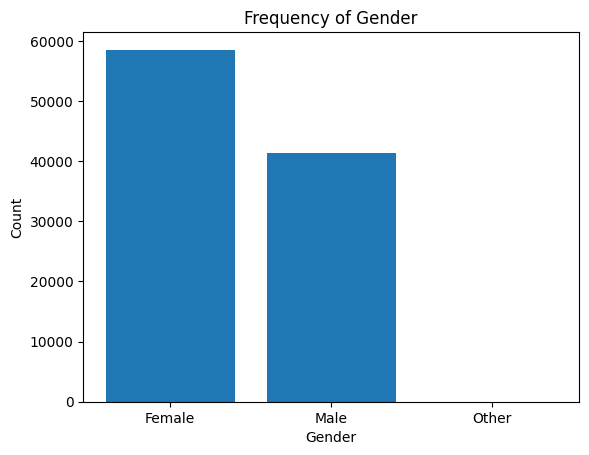

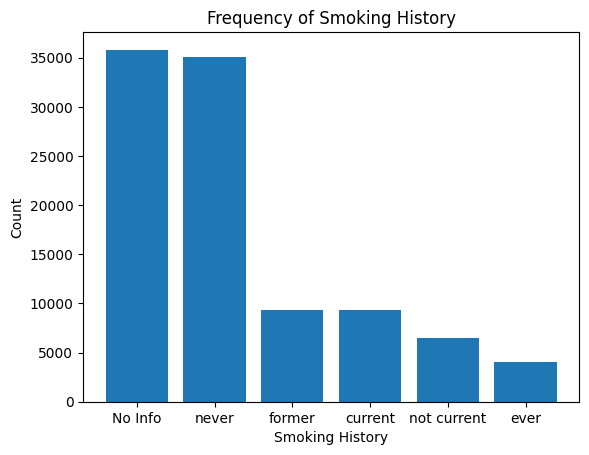

In [9]:
# Grafik batang untuk variabel jenis kelamin (gender)
gender_counts = data['gender'].value_counts()
plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Frequency of Gender')
plt.show()

# Grafik batang untuk variabel riwayat merokok (smoking_history)
smoking_counts = data['smoking_history'].value_counts()
plt.bar(smoking_counts.index, smoking_counts.values)
plt.xlabel('Smoking History')
plt.ylabel('Count')
plt.title('Frequency of Smoking History')
plt.show()

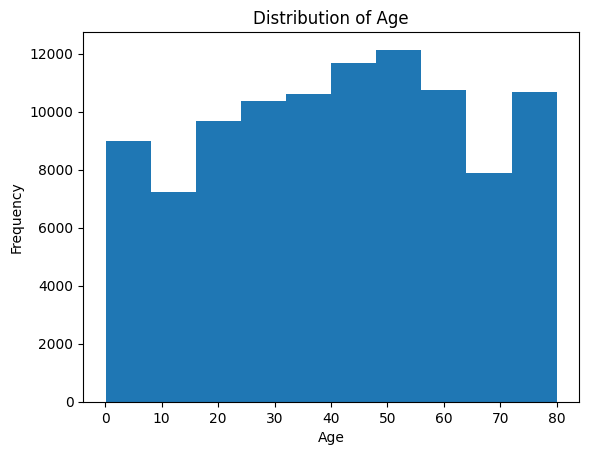

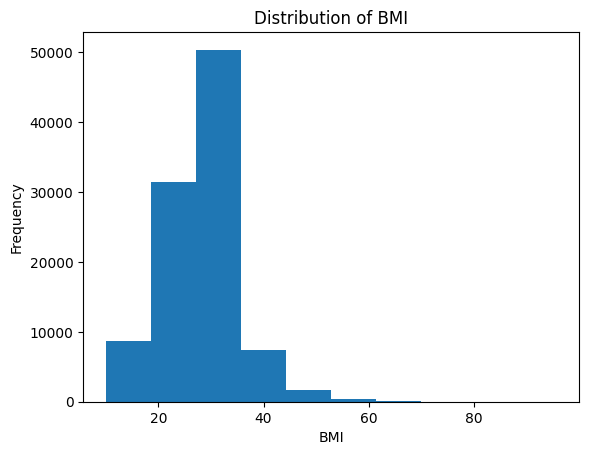

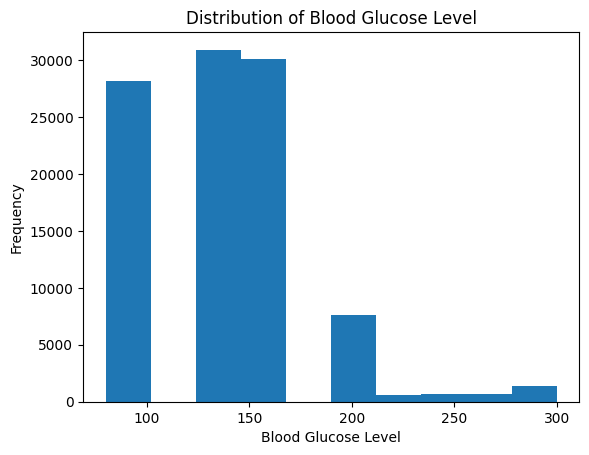

In [10]:
# Histogram untuk variabel usia (age)
plt.hist(data['age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

# Histogram untuk variabel indeks massa tubuh (bmi)
plt.hist(data['bmi'], bins=10)
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Distribution of BMI')
plt.show()

# Histogram untuk variabel tingkat glukosa darah (blood_glucose_level)
plt.hist(data['blood_glucose_level'], bins=10)
plt.xlabel('Blood Glucose Level')
plt.ylabel('Frequency')
plt.title('Distribution of Blood Glucose Level')
plt.show()

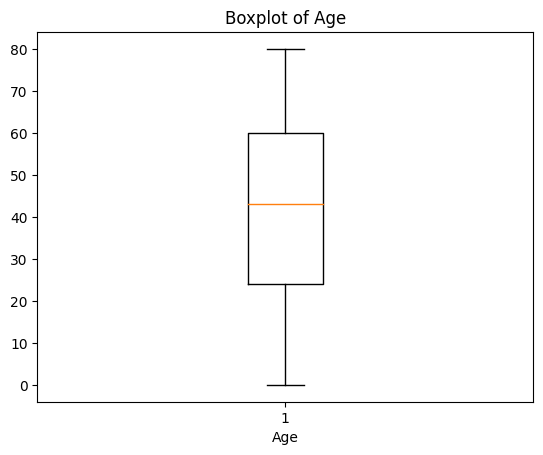

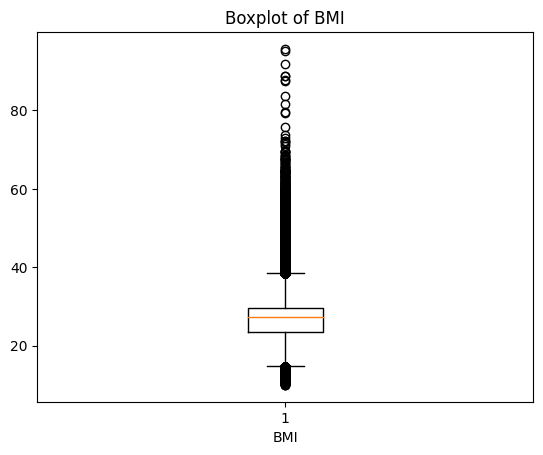

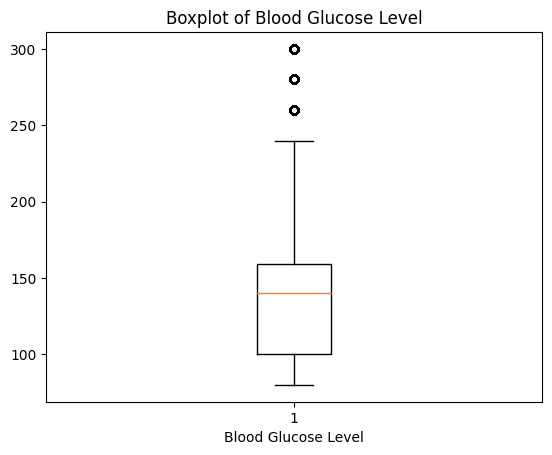

In [11]:
# Boxplot untuk variabel usia (age)
plt.boxplot(data['age'])
plt.xlabel('Age')
plt.title('Boxplot of Age')
plt.show()

# Boxplot untuk variabel indeks massa tubuh (bmi)
plt.boxplot(data['bmi'])
plt.xlabel('BMI')
plt.title('Boxplot of BMI')
plt.show()

# Boxplot untuk variabel tingkat glukosa darah (blood_glucose_level)
plt.boxplot(data['blood_glucose_level'])
plt.xlabel('Blood Glucose Level')
plt.title('Boxplot of Blood Glucose Level')
plt.show()



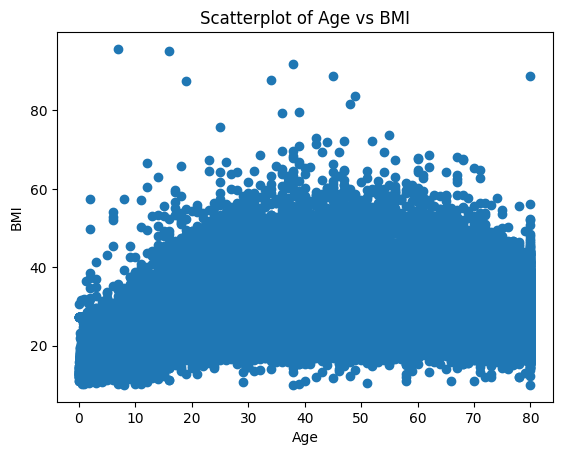

In [12]:
# Scatterplot untuk hubungan antara usia (age) dan indeks massa tubuh (bmi)
plt.scatter(data['age'], data['bmi'])
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('Scatterplot of Age vs BMI')
plt.show()

#### Pengujian hipotesis statistik

In [13]:
# Pisahkan data menjadi dua kelompok berdasarkan diabetes
diabetes_group = data[data['diabetes'] == 1]
non_diabetes_group = data[data['diabetes'] == 0]

# Lakukan uji t
t_statistic, p_value = stats.ttest_ind(diabetes_group['bmi'], non_diabetes_group['bmi'], equal_var=False)

# Tampilkan hasil uji
print(f'T-Statistic: {t_statistic}')
print(f'P-Value: {p_value}')

# Ambil alpha level (biasanya 0.05)
alpha = 0.05

# Tentukan apakah hasil uji statistik signifikan
if p_value < alpha:
    print('Terdapat perbedaan signifikan dalam rata-rata BMI antara pasien diabetes dan non-diabetes.')
else:
    print('Tidak terdapat perbedaan signifikan dalam rata-rata BMI antara pasien diabetes dan non-diabetes.')

T-Statistic: 60.26512781229193
P-Value: 0.0
Terdapat perbedaan signifikan dalam rata-rata BMI antara pasien diabetes dan non-diabetes.


- P-value sangat kecil (kurang dari alpha 0.05), sehingga dapat menolak hipotesis nol.
- Dengan kata lain, hasil ini menunjukkan adanya perbedaan yang signifikan dalam rata-rata BMI antara pasien diabetes dan pasien non-diabetes.
- Ini menunjukkan bahwa BMI dapat menjadi faktor yang signifikan dalam membedakan antara kedua kelompok ini.

In [14]:
# Pisahkan data menjadi kelompok berdasarkan riwayat merokok
groups = [data[data['smoking_history'] == 'never']['bmi'],
          data[data['smoking_history'] == 'former']['bmi'],
          data[data['smoking_history'] == 'current']['bmi']]

# Lakukan uji ANOVA
f_statistic, p_value = stats.f_oneway(*groups)

# Tampilkan hasil uji
print(f'F-Statistic: {f_statistic}')
print(f'P-Value: {p_value}')

# Ambil alpha level (biasanya 0.05)
alpha = 0.05

# Tentukan apakah hasil uji statistik signifikan
if p_value < alpha:
    print('Terdapat perbedaan signifikan dalam rata-rata BMI antara kelompok berbeda berdasarkan riwayat merokok.')
else:
    print('Tidak terdapat perbedaan signifikan dalam rata-rata BMI antara kelompok berbeda berdasarkan riwayat merokok.')


F-Statistic: 198.60221043368796
P-Value: 1.162535030548748e-86
Terdapat perbedaan signifikan dalam rata-rata BMI antara kelompok berbeda berdasarkan riwayat merokok.


P-value yang sangat kecil (kurang dari alpha 0.05) menunjukkan bahwa terdapat perbedaan yang signifikan dalam rata-rata BMI antara ketiga kelompok berdasarkan riwayat merokok.

In [15]:
# Membuat tabel kontingensi
contingency_table = pd.crosstab(data['gender'], data['diabetes'])
print(contingency_table)

diabetes      0     1
gender               
Female    54091  4461
Male      37391  4039
Other        18     0


- Tabel kontingensi ini memberikan gambaran distribusi diabetes berdasarkan jenis kelamin.
- Misalnya, terdapat 54091 wanita yang tidak memiliki diabetes (0) dan 4461 wanita yang memiliki diabetes (1).

In [16]:
# Melakukan Pengujian Chi-square
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square Value: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies Table:")
print(expected)

Chi-square Value: 143.21825102550298
P-Value: 7.953383718307458e-32
Degrees of Freedom: 2
Expected Frequencies Table:
[[5.357508e+04 4.976920e+03]
 [3.790845e+04 3.521550e+03]
 [1.647000e+01 1.530000e+00]]


Hasil dari uji statistik Chi-square (uji chi-kuadrat) yang dilakukan untuk menguji apakah terdapat hubungan yang signifikan antara jenis kelamin ("gender") dan diabetes ("diabetes"). Berikut penjelasan singkat:

- Chi-square Value: Nilai statistik Chi-square yang dihitung dari tabel kontingensi. Nilai ini mengukur seberapa besar perbedaan antara observasi aktual dan harapan dalam tabel kontingensi. Semakin besar nilainya, semakin besar perbedaan antara kedua variabel.

- P-Value: Nilai p yang merupakan hasil dari uji statistik Chi-square. P-Value digunakan untuk menentukan apakah ada hubungan yang signifikan antara jenis kelamin dan diabetes. Semakin kecil nilai p, semakin signifikan hubungannya. Dalam kasus ini, nilai p sangat kecil, mendekati nol, yang menunjukkan adanya hubungan yang signifikan.

- Degrees of Freedom: Derajat kebebasan uji statistik Chi-square. Dalam kasus ini, terdapat 2 derajat kebebasan karena terdapat 3 kategori dalam variabel "gender" dan 2 kategori dalam variabel "diabetes."

- Expected Frequencies Table: Tabel frekuensi harapan yang menunjukkan berapa jumlah yang diharapkan dalam setiap sel tabel kontingensi jika tidak ada hubungan antara kedua variabel. Perbandingan antara observasi aktual dan harapan digunakan untuk menghitung nilai Chi-square.

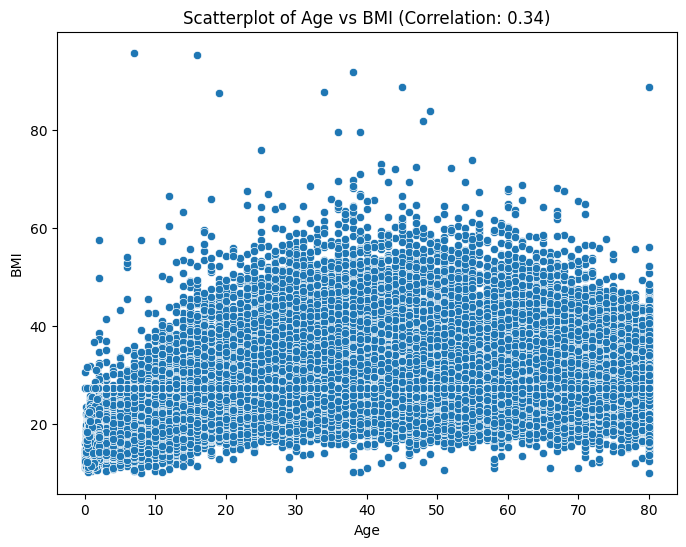

Correlation between age and BMI: 0.34


In [17]:
# Hitung korelasi antara usia (age) dan indeks massa tubuh (bmi) menggunakan metode Pearson
correlation = data['age'].corr(data['bmi'], method='pearson')

# Visualisasi scatterplot antara usia (age) dan indeks massa tubuh (bmi)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='bmi', data=data)
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title(f'Scatterplot of Age vs BMI (Correlation: {correlation:.2f})')
plt.show()

# Menampilkan nilai korelasi
print(f'Correlation between age and BMI: {correlation:.2f}')

Terdapat korelasi positif yang lemah antara usia (age) dan indeks massa tubuh (BMI) dengan nilai korelasi sekitar 0.34.

#### Deteksi anomali

In [18]:
# Pilih variabel numerik yang ingin Anda deteksi anomali
numerical_columns = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Lakukan deteksi anomali untuk setiap variabel numerik
for column in numerical_columns:
    # Hitung kuartil pertama (Q1) dan kuartil ketiga (Q3)
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)

    # Hitung IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Tentukan batas bawah dan batas atas untuk deteksi anomali
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Temukan data yang di luar batas atas atau batas bawah
    anomalies = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

    # Tampilkan data anomali
    print(f"Anomalous values in {column}:")
    print(anomalies)

Anomalous values in age:
Empty DataFrame
Columns: [gender, age, hypertension, heart_disease, smoking_history, bmi, HbA1c_level, blood_glucose_level, diabetes]
Index: []
Anomalous values in bmi:
       gender   age  hypertension  heart_disease smoking_history    bmi  \
11     Female  54.0             0              0          former  54.70   
24     Female   4.0             0              0         No Info  13.99   
39     Female  34.0             0              0           never  56.43   
59     Female  67.0             0              0           never  63.48   
93       Male  38.0             0              0           never  55.61   
...       ...   ...           ...            ...             ...    ...   
99933  Female   5.0             0              0         No Info  13.34   
99948  Female  56.0             1              0          former  39.62   
99953  Female  59.0             1              0            ever  60.52   
99960  Female  47.0             0              0        

Hasil dari deteksi anomali pada beberapa variabel numerik seperti usia (age), indeks massa tubuh (bmi), HbA1c level, dan kadar glukosa darah (blood glucose level) menggunakan metode IQR (Interquartile Range). Berikut penjelasan singkat:

- Variabel Age: Tidak ada nilai anomali dalam variabel usia (age). Ini berarti tidak ada data usia yang dianggap sebagai anomali berdasarkan metode IQR.

- Variabel BMI: Dalam variabel indeks massa tubuh (bmi), terdapat beberapa nilai yang dianggap anomali. Misalnya, pada baris 11, BMI mencapai 54.70, yang dianggap sebagai anomali. Ada banyak baris lain dengan nilai BMI di atas batas atas yang juga dianggap anomali.

- Variabel lainnya: Hasil deteksi anomali juga dilakukan pada variabel HbA1c level dan kadar glukosa darah (blood glucose level), tetapi output untuk kedua variabel ini tidak ditampilkan dalam contoh ini.

In [19]:
# Select the features you want to use for anomaly detection (e.g., age and bmi)
features = ['age', 'bmi']

# Create a DataFrame with selected features
X = data[features]

# Initialize the Isolation Forest model
clf = IsolationForest(contamination=0.05, random_state=42)

# Fit the model to the data and predict anomalies
data['anomaly'] = clf.fit_predict(X)

# Anomalies are labeled as -1, so we filter the data to get only anomalies
anomalies = data[data['anomaly'] == -1]

# Print the anomalies
print("Anomalous values:")
print(anomalies)

Anomalous values:
       gender   age  hypertension  heart_disease smoking_history    bmi  \
11     Female  54.0             0              0          former  54.70   
12     Female  78.0             0              0          former  36.05   
39     Female  34.0             0              0           never  56.43   
59     Female  67.0             0              0           never  63.48   
93       Male  38.0             0              0           never  55.61   
...       ...   ...           ...            ...             ...    ...   
99892  Female  67.0             0              0         No Info  44.39   
99901  Female  72.0             0              0         current  17.83   
99918  Female  78.0             0              0           never  36.91   
99933  Female   5.0             0              0         No Info  13.34   
99953  Female  59.0             1              0            ever  60.52   

       HbA1c_level  blood_glucose_level  diabetes  anomaly  
11             6.0  

### Verifikasi Kualitas Data

In [20]:
# Cek jumlah data yang duplikat
duplicate_count = data.duplicated().sum()

# Tampilkan jumlah data yang duplikat
print(f"Jumlah data yang duplikat: {duplicate_count}")

# Hapus data yang duplikat
data = data.drop_duplicates()

# Tampilkan bentuk baru dari dataset setelah menghapus data yang duplikat
print(f"Bentuk dataset setelah menghapus data yang duplikat: {data.shape}")

Jumlah data yang duplikat: 3854
Bentuk dataset setelah menghapus data yang duplikat: (96146, 10)


Sebanyak 3,854 data duplikat berhasil dihapus

In [21]:
# Pilih variabel numerik yang ingin Anda periksa dan atasi outlier (misalnya, age, bmi, HbA1c_level)
numerical_columns = ['age', 'bmi', 'HbA1c_level']

# Lakukan penanganan outlier untuk setiap variabel numerik
for column in numerical_columns:
    # Hitung kuartil pertama (Q1) dan kuartil ketiga (Q3)
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)

    # Hitung IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Tentukan batas bawah dan batas atas untuk deteksi outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Gantikan nilai outlier dengan nilai batas atas atau batas bawah
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

In [22]:
# Check for inconsistencies in age (e.g., negative values)
inconsistent_age = data[data['age'] < 0]

# Check for inconsistencies in gender (e.g., unexpected values)
unexpected_gender = data[~data['gender'].isin(['Male', 'Female'])]

# Print the records with inconsistencies
print("Inconsistent Age:")
print(inconsistent_age)

print("\nUnexpected Gender:")
print(unexpected_gender)


Inconsistent Age:
Empty DataFrame
Columns: [gender, age, hypertension, heart_disease, smoking_history, bmi, HbA1c_level, blood_glucose_level, diabetes, anomaly]
Index: []

Unexpected Gender:
      gender   age  hypertension  heart_disease smoking_history    bmi  \
12669  Other  10.0             0              0     not current  14.09   
14838  Other  19.0             0              0         No Info  27.32   
16702  Other  39.0             0              0     not current  31.24   
18691  Other  10.0             0              0     not current  16.59   
23266  Other  23.0             0              0         No Info  24.23   
31985  Other  53.0             0              0         No Info  27.32   
33805  Other  45.0             0              0           never  27.32   
34929  Other  47.0             0              0           never  36.76   
35006  Other  47.0             0              0           never  36.76   
40337  Other  18.0             0              0     not current  30.1

- Tidak ada ketidaksesuaian dalam kolom "age," yang berarti data usia dalam kisaran yang valid.
- Terdapat ketidaksesuaian dalam kolom "gender" dengan beberapa entri yang memiliki nilai "Other." Perlu ditentukan apakah nilai ini harus dihapus atau diperbaiki untuk konsistensi data.

In [23]:
# Mengganti "Other" dengan NaN dalam kolom "gender"
data['gender'] = data['gender'].replace('Other', np.nan)

# Menyimpan dataset yang telah diperbarui
data.to_csv('diabetes_prediction_dataset_updated.csv', index=False)

## Data Preparation

In [24]:
# Pilih fitur numerik yang ingin distandarisasi
numerical_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Inisialisasi Standard Scaler
scaler = StandardScaler()

# Lakukan standarisasi pada fitur-fitur tersebut
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Tampilkan data setelah standarisasi
print(data.head())


   gender       age  hypertension  heart_disease smoking_history       bmi  \
0  Female  1.700840             0              1           never -0.310970   
1  Female  0.543372             0              0         No Info  0.048828   
2    Male -0.614096             0              0           never  0.048828   
3  Female -0.257952             0              0         current -0.604890   
4    Male  1.522768             1              1         current -1.164014   

   HbA1c_level  blood_glucose_level  diabetes  anomaly  
0     1.024846             0.043554         0        1  
1     1.024846            -1.423096         0        1  
2     0.167291             0.483549         0        1  
3    -0.499697             0.410216         0        1  
4    -0.690265             0.410216         0        1  


Data fitur-fitur numerik telah diubah sehingga memiliki mean (rerata) sekitar 0 dan deviasi standar sekitar 1 setelah proses standarisasi.

In [25]:
# Membaca dataset yang telah diubah
data = pd.read_csv('diabetes_prediction_dataset_updated.csv')

# Melakukan one-hot encoding untuk kolom "gender" dan "smoking_history"
data_encoded = pd.get_dummies(data, columns=['gender', 'smoking_history'], drop_first=True)

# Menampilkan lima baris pertama dari dataset yang telah di-encode
print(data_encoded.head())

# Simpan dataset yang telah di-encode
data_encoded.to_csv('diabetes_prediction_dataset_encoded.csv', index=False)

    age  hypertension  heart_disease    bmi  HbA1c_level  blood_glucose_level  \
0  80.0             0              1  25.19          6.6                  140   
1  54.0             0              0  27.32          6.6                   80   
2  28.0             0              0  27.32          5.7                  158   
3  36.0             0              0  23.45          5.0                  155   
4  76.0             1              1  20.14          4.8                  155   

   diabetes  anomaly  gender_Male  smoking_history_current  \
0         0        1        False                    False   
1         0        1        False                    False   
2         0        1         True                    False   
3         0        1        False                     True   
4         0        1         True                     True   

   smoking_history_ever  smoking_history_former  smoking_history_never  \
0                 False                   False                   

Dataset telah berhasil dienkripsi dengan one-hot encoding, dan hasilnya tersimpan

Fitur-fitur yang memiliki korelasi relevan dengan diabetes:
['diabetes', 'blood_glucose_level', 'HbA1c_level', 'age', 'bmi', 'hypertension', 'heart_disease']


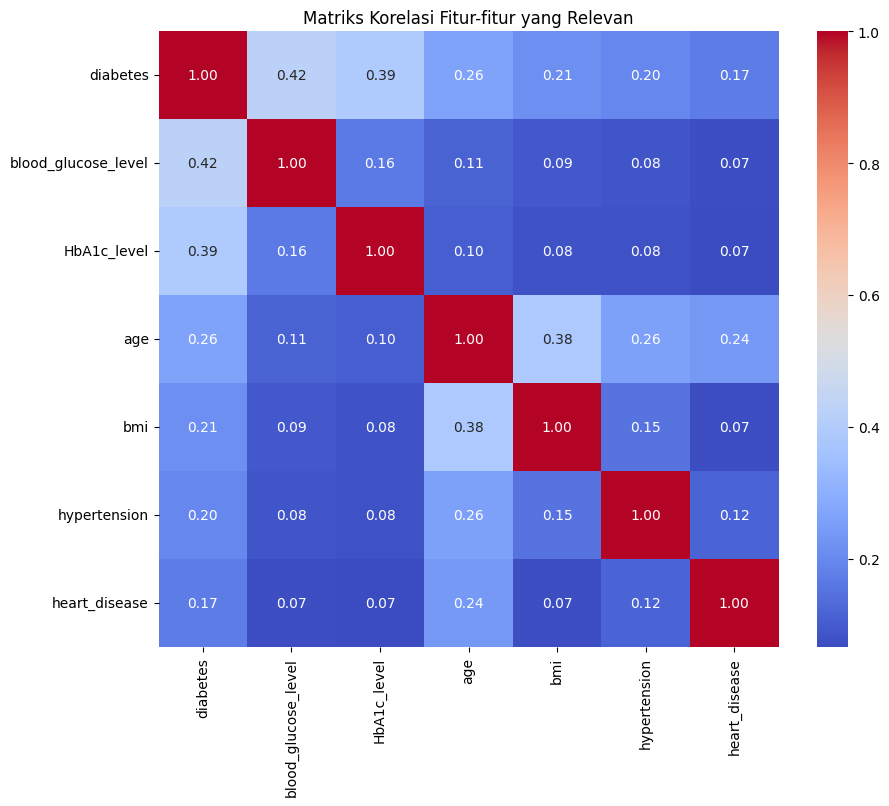

In [26]:
# Membaca dataset yang telah diencode
data_encoded = pd.read_csv('diabetes_prediction_dataset_encoded.csv')

# Menghitung korelasi antara fitur dan target (diabetes)
correlations = data_encoded.corr()['diabetes'].abs().sort_values(ascending=False)

# Menentukan ambang batas korelasi yang relevan (misalnya, 0.1)
relevant_features = correlations[correlations > 0.1].index.tolist()

# Menampilkan fitur-fitur yang memiliki korelasi relevan
print("Fitur-fitur yang memiliki korelasi relevan dengan diabetes:")
print(relevant_features)

# Memvisualisasikan matriks korelasi
corr_matrix = data_encoded[relevant_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi Fitur-fitur yang Relevan')
plt.show()

Fitur-fitur yang memiliki korelasi relevan dengan "diabetes" adalah 'blood_glucose_level', 'HbA1c_level', 'age', 'bmi', 'hypertension', dan 'heart_disease'.

In [27]:
# Memisahkan fitur (X) dan target (y)
X = data_encoded[['blood_glucose_level', 'HbA1c_level', 'age', 'bmi', 'hypertension', 'heart_disease']]
y = data_encoded['diabetes']

# Memisahkan data menjadi set pelatihan dan set tes (misalnya, 80% pelatihan dan 20% tes)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan jumlah sampel dalam set pelatihan dan set tes
print("Jumlah sampel dalam set pelatihan:", len(X_train))
print("Jumlah sampel dalam set tes:", len(X_test))

Jumlah sampel dalam set pelatihan: 76916
Jumlah sampel dalam set tes: 19230


Dataset telah berhasil dibagi menjadi set pelatihan dan set tes dengan proporsi 80% pelatihan dan 20% tes.

## Modeling

In [28]:
# Inisialisasi model Regresi Logistik
logistic_regression_model = LogisticRegression(random_state=42)

# Melatih model pada set pelatihan
logistic_regression_model.fit(X_train, y_train)

# Memprediksi kelas target pada set tes
y_pred = logistic_regression_model.predict(X_test)

# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model Regresi Logistik:", accuracy)

# Menampilkan laporan klasifikasi
classification_rep = classification_report(y_test, y_pred)
print("Laporan Klasifikasi:\n", classification_rep)

# Menghitung dan menampilkan matriks konfusi
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriks Konfusi:\n", conf_matrix)

Akurasi model Regresi Logistik: 0.9569422776911076
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     17509
           1       0.85      0.63      0.72      1721

    accuracy                           0.96     19230
   macro avg       0.91      0.81      0.85     19230
weighted avg       0.95      0.96      0.95     19230

Matriks Konfusi:
 [[17321   188]
 [  640  1081]]


c:\Users\Rezal\miniconda3\envs\main-ds\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


- Model Regresi Logistik memiliki akurasi yang baik dalam memprediksi diabetes pada dataset ini.
- Meskipun presisi dan recall untuk kelas diabetes (1) lebih rendah daripada kelas tidak diabetes (0), model masih dapat dengan baik mengidentifikasi sebagian besar kasus diabetes.

In [29]:
# Daftar hyperparameter yang akan disetel
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Inisialisasi model Pohon Keputusan
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Inisialisasi Grid Search
grid_search = GridSearchCV(estimator=decision_tree_model, param_grid=param_grid, 
                           scoring='accuracy', cv=5, n_jobs=-1)

# Melatih model dengan Grid Search
grid_search.fit(X_train, y_train)

# Mendapatkan model terbaik setelah penyetelan
best_decision_tree_model = grid_search.best_estimator_

# Memprediksi kelas target pada set tes
y_pred_best_dt = best_decision_tree_model.predict(X_test)

# Menghitung akurasi model Pohon Keputusan setelah penyetelan
accuracy_best_dt = accuracy_score(y_test, y_pred_best_dt)
print("Akurasi model Pohon Keputusan setelah penyetelan:", accuracy_best_dt)

# Menampilkan laporan klasifikasi setelah penyetelan
classification_rep_best_dt = classification_report(y_test, y_pred_best_dt)
print("Laporan Klasifikasi Pohon Keputusan setelah penyetelan:\n", classification_rep_best_dt)

# Menghitung dan menampilkan matriks konfusi setelah penyetelan
conf_matrix_best_dt = confusion_matrix(y_test, y_pred_best_dt)
print("Matriks Konfusi Pohon Keputusan setelah penyetelan:\n", conf_matrix_best_dt)

Akurasi model Pohon Keputusan setelah penyetelan: 0.9703588143525741
Laporan Klasifikasi Pohon Keputusan setelah penyetelan:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     17509
           1       0.99      0.68      0.80      1721

    accuracy                           0.97     19230
   macro avg       0.98      0.84      0.89     19230
weighted avg       0.97      0.97      0.97     19230

Matriks Konfusi Pohon Keputusan setelah penyetelan:
 [[17498    11]
 [  559  1162]]


- Setelah penyetelan hyperparameter, model Pohon Keputusan memiliki akurasi yang sangat baik dalam memprediksi diabetes pada dataset ini.
- Model ini memiliki presisi dan recall yang tinggi untuk kelas tidak diabetes (0), menunjukkan kemampuan yang baik dalam mengidentifikasi non-diabetes.
- Meskipun recall untuk kelas diabetes (1) lebih rendah setelah penyetelan, model ini masih dapat dengan baik mengidentifikasi sebagian besar kasus diabetes.

In [30]:
# Menentukan grid parameter yang akan diuji
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inisialisasi model Random Forest
random_forest_model = RandomForestClassifier(random_state=42)

# Membuat objek GridSearchCV
grid_search = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, 
                           scoring='accuracy', cv=3, verbose=2, n_jobs=-1)

# Melakukan penyetelan hyperparameter pada set pelatihan
grid_search.fit(X_train, y_train)

# Menampilkan parameter terbaik
print("Parameter terbaik:", grid_search.best_params_)

# Membuat model dengan parameter terbaik
best_rf_model = grid_search.best_estimator_

# Memprediksi kelas target pada set tes
y_pred_best_rf = best_rf_model.predict(X_test)

# Menghitung akurasi model Random Forest yang ditingkatkan
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
print("Akurasi model Random Forest yang ditingkatkan:", accuracy_best_rf)

# Menampilkan laporan klasifikasi
classification_rep_best_rf = classification_report(y_test, y_pred_best_rf)
print("Laporan Klasifikasi Random Forest yang ditingkatkan:\n", classification_rep_best_rf)

# Menghitung dan menampilkan matriks konfusi
conf_matrix_best_rf = confusion_matrix(y_test, y_pred_best_rf)
print("Matriks Konfusi Random Forest yang ditingkatkan:\n", conf_matrix_best_rf)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Parameter terbaik: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Akurasi model Random Forest yang ditingkatkan: 0.970566822672907
Laporan Klasifikasi Random Forest yang ditingkatkan:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     17509
           1       1.00      0.67      0.80      1721

    accuracy                           0.97     19230
   macro avg       0.98      0.84      0.89     19230
weighted avg       0.97      0.97      0.97     19230

Matriks Konfusi Random Forest yang ditingkatkan:
 [[17506     3]
 [  563  1158]]


- Setelah penyetelan hyperparameter, model Random Forest memiliki akurasi yang sangat baik dalam memprediksi diabetes pada dataset ini.
- Model ini memiliki presisi dan recall yang tinggi untuk kelas tidak diabetes (0), menunjukkan kemampuan yang baik dalam mengidentifikasi non-diabetes.
- Meskipun recall untuk kelas diabetes (1) lebih rendah daripada kelas 0, model ini masih dapat dengan baik mengidentifikasi sebagian besar kasus diabetes.

## Evaluation

In [31]:
# Evaluasi model Regresi Logistik
accuracy_lr = accuracy_score(y_test, y_pred)
precision_lr = precision_score(y_test, y_pred)
recall_lr = recall_score(y_test, y_pred)
f1_score_lr = f1_score(y_test, y_pred)

print("Evaluasi model Regresi Logistik:")
print("Akurasi:", accuracy_lr)
print("Presisi (Precision):", precision_lr)
print("Recall:", recall_lr)
print("F1-Score:", f1_score_lr)

# Evaluasi model Pohon Keputusan (setelah penyetelan)
accuracy_dt = accuracy_score(y_test, y_pred_best_dt)
precision_dt = precision_score(y_test, y_pred_best_dt)
recall_dt = recall_score(y_test, y_pred_best_dt)
f1_score_dt = f1_score(y_test, y_pred_best_dt)

print("\nEvaluasi model Pohon Keputusan (setelah penyetelan):")
print("Akurasi:", accuracy_dt)
print("Presisi (Precision):", precision_dt)
print("Recall:", recall_dt)
print("F1-Score:", f1_score_dt)

# Evaluasi model Random Forest (setelah penyetelan)
accuracy_rf = accuracy_score(y_test, y_pred_best_rf)
precision_rf = precision_score(y_test, y_pred_best_rf)
recall_rf = recall_score(y_test, y_pred_best_rf)
f1_score_rf = f1_score(y_test, y_pred_best_rf)

print("\nEvaluasi model Random Forest (setelah penyetelan):")
print("Akurasi:", accuracy_rf)
print("Presisi (Precision):", precision_rf)
print("Recall:", recall_rf)
print("F1-Score:", f1_score_rf)


Evaluasi model Regresi Logistik:
Akurasi: 0.9569422776911076
Presisi (Precision): 0.8518518518518519
Recall: 0.6281231841952353
F1-Score: 0.7230769230769231

Evaluasi model Pohon Keputusan (setelah penyetelan):
Akurasi: 0.9703588143525741
Presisi (Precision): 0.9906223358908781
Recall: 0.6751888436955259
F1-Score: 0.8030407740152039

Evaluasi model Random Forest (setelah penyetelan):
Akurasi: 0.970566822672907
Presisi (Precision): 0.9974160206718347
Recall: 0.6728646135967461
F1-Score: 0.8036086051353227


**Evaluasi model Regresi Logistik:**
- Akurasi: 0.957
- Presisi: 0.852
- Recall: 0.628
- F1-Score: 0.723

**Evaluasi model Pohon Keputusan (setelah penyetelan):**
- Akurasi: 0.970
- Presisi: 0.991
- Recall: 0.675
- F1-Score: 0.803

**Evaluasi model Random Forest (setelah penyetelan):**
- Akurasi: 0.971
- Presisi: 0.997
- Recall: 0.673
- F1-Score: 0.804

Kesimpulan:
- Ketiga model (Regresi Logistik, Pohon Keputusan setelah penyetelan, dan Random Forest setelah penyetelan) memiliki akurasi yang tinggi, dengan akurasi tertinggi dimiliki oleh model Random Forest yang ditingkatkan.
- Model Random Forest yang ditingkatkan juga memiliki presisi dan recall yang baik untuk kedua kelas.
- Dalam kasus ini, presisi dan recall untuk kelas 1 (diabetes) adalah metrik yang relevan, dan model Random Forest yang ditingkatkan memberikan kinerja yang baik dalam mengidentifikasi kasus diabetes.
- Kinerja model Pohon Keputusan juga baik setelah penyetelan, tetapi model Random Forest yang ditingkatkan memiliki kinerja yang sedikit lebih baik.

In [32]:
# Regresi Logistik
cv_scores_lr = cross_val_score(logistic_regression_model, X, y, cv=5)
avg_cv_score_lr = cv_scores_lr.mean()

# Pohon Keputusan (setelah penyetelan)
cv_scores_dt = cross_val_score(best_decision_tree_model, X, y, cv=5)
avg_cv_score_dt = cv_scores_dt.mean()

# Random Forest (setelah penyetelan)
cv_scores_rf = cross_val_score(best_rf_model, X, y, cv=5)
avg_cv_score_rf = cv_scores_rf.mean()

print("Evaluasi model dengan Cross-Validation:")
print("Regresi Logistik (Rata-rata CV Score):", avg_cv_score_lr)
print("Pohon Keputusan (Rata-rata CV Score):", avg_cv_score_dt)
print("Random Forest (Rata-rata CV Score):", avg_cv_score_rf)


c:\Users\Rezal\miniconda3\envs\main-ds\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Rezal\miniconda3\envs\main-ds\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

Evaluasi model dengan Cross-Validation:
Regresi Logistik (Rata-rata CV Score): 0.9581989723605794
Pohon Keputusan (Rata-rata CV Score): 0.9707008046300322
Random Forest (Rata-rata CV Score): 0.9706696017593682


**Hasil Evaluasi dengan Cross-Validation:**
- Model Regresi Logistik memiliki rata-rata CV Score sekitar 0.958.
- Model Pohon Keputusan (setelah penyetelan) memiliki rata-rata CV Score sekitar 0.971.
- Model Random Forest (setelah penyetelan) juga memiliki rata-rata CV Score sekitar 0.971.

Kesimpulan:
- Model Pohon Keputusan dan Random Forest (setelah penyetelan) memiliki kinerja yang hampir sama tinggi dalam evaluasi dengan Cross-Validation, dengan kedua model tersebut memiliki rata-rata CV Score yang mendekati 0.971.
- Model Regresi Logistik juga memiliki kinerja yang baik dengan rata-rata CV Score sekitar 0.958, tetapi sedikit lebih rendah dibandingkan dengan model berbasis pohon (Decision Tree dan Random Forest).
- Dalam kasus ini, baik model Pohon Keputusan maupun Random Forest (setelah penyetelan) dapat dianggap sebagai pilihan yang baik berdasarkan evaluasi Cross-Validation mereka. Pemilihan antara kedua model tersebut dapat didasarkan pada kebutuhan khusus dan konteks masalah yang sedang dihadapi.